In [351]:
import zipfile
zip_ref = zipfile.ZipFile('/content/GurNum.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [352]:
# Define the directory where the original images are located in folders
train_dir_path = '/content/GurNum/train/'
val_dir_path = '/content/GurNum/val/'


In [353]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Define the image size and number of channels
img_width, img_height, channels = 28, 28, 10

# Load the images and labels from the directories

def load_data(data_dir):
    x = []
    y = []
    for label in os.listdir(data_dir):
        for image_name in os.listdir(os.path.join(data_dir, label)):
            image = load_img(os.path.join(data_dir, label, image_name),target_size=(img_width, img_height))
            image_arr = img_to_array(image)
            x.append(image_arr)
            y.append(int(label))
    x = np.array(x)
    y = np.array(y)
    images = np.array(x)
    labels = np.array(y)
    # Save the arrays in NumPy format
    if "train" in data_dir:
      np.save('x_train.npy', images)
      np.save('y_train.npy', labels)

    if "val" in data_dir:
      # Save the arrays in NumPy format
      np.save('x_test.npy', images)
      np.save('y_test.npy', labels) 

# Load the dataset
load_data(train_dir_path)
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
load_data(val_dir_path)
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


In [354]:
len(X_train)

1000

In [355]:
len(X_test)

178

In [356]:
X_train[0].shape

(28, 28, 3)

In [357]:
X_train[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

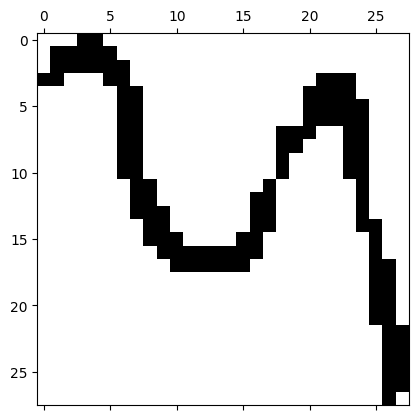

In [358]:
plt.matshow(X_train[0])

In [359]:
y_train[0]

5

In [360]:
X_train = X_train / 255
X_test = X_test / 255

In [361]:
X_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.]]], dtype=float32)

In [362]:
model = keras.Sequential([
 # Using Flatten layer so that we don't have to call .reshape on input dataset   
 keras.layers.Flatten(),
 keras.layers.Dense(channels, input_shape=(784,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train the model
model.fit(X_train, y_train,epochs= 10, validation_data=(X_test, y_test))


Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 1.2911 - accuracy: 0.6060 - val_loss: 0.7100 - val_accuracy: 0.8146
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3047 - accuracy: 0.9370 - val_loss: 0.4277 - val_accuracy: 0.8652
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1936 - accuracy: 0.9540 - val_loss: 0.3313 - val_accuracy: 0.9270
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9630 - val_loss: 0.2972 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1201 - accuracy: 0.9750 - val_loss: 0.2978 - val_accuracy: 0.9213
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9830 - val_loss: 0.2454 - val_accuracy: 0.9382
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0843 - accuracy: 0.9870 - val_loss: 0.2306 - val_accuracy: 0.9438
Epoch 8/10
32/32 [==

In [363]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9551


[0.19101226329803467, 0.9550561904907227]

In [364]:
y_predicted = model.predict(X_test)
y_predicted[0]

6/6 [==============================] - 0s 2ms/step


array([0.00920351, 0.01098865, 0.36509338, 0.624434  , 0.81972   ,
       0.9994503 , 0.03300745, 0.4549194 , 0.20751916, 0.04534071],
      dtype=float32)

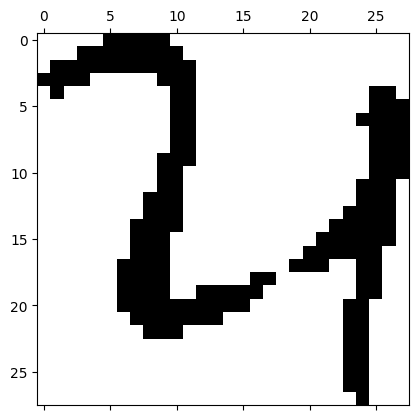

In [365]:
plt.matshow(X_test[0])

In [366]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

5

In [367]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [368]:
y_predicted_labels[:5]

[5, 5, 5, 5, 5]

In [369]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0, 14,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

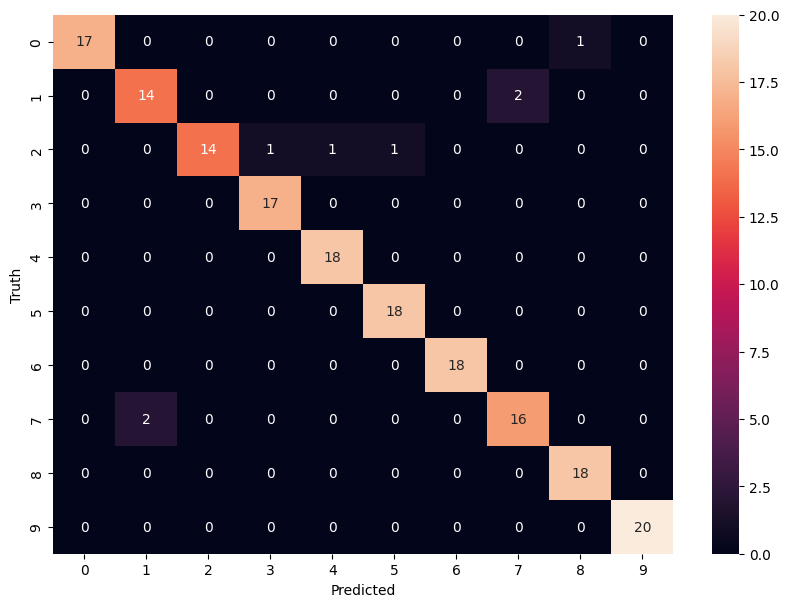

In [370]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [371]:
#Using hidden layer
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(300, input_shape=(784,), activation='relu'),
 keras.layers.Dense(channels,activation = 'sigmoid')
])
# compile the nn
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# train the model
model2.fit(X_train, y_train,epochs= 10, validation_data=(X_test, y_test))


Epoch 1/10
32/32 [==============================] - 1s 22ms/step - loss: 1.4000 - accuracy: 0.6410 - val_loss: 0.5170 - val_accuracy: 0.8258
Epoch 2/10
32/32 [==============================] - 1s 16ms/step - loss: 0.2704 - accuracy: 0.9010 - val_loss: 0.4411 - val_accuracy: 0.8820
Epoch 3/10
32/32 [==============================] - 0s 15ms/step - loss: 0.1785 - accuracy: 0.9400 - val_loss: 0.2453 - val_accuracy: 0.9326
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0898 - accuracy: 0.9810 - val_loss: 0.2387 - val_accuracy: 0.9326
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0814 - accuracy: 0.9770 - val_loss: 0.2145 - val_accuracy: 0.9382
Epoch 6/10
32/32 [==============================] - 0s 15ms/step - loss: 0.0571 - accuracy: 0.9890 - val_loss: 0.2081 - val_accuracy: 0.9382
Epoch 7/10
32/32 [==============================] - 0s 15ms/step - loss: 0.0540 - accuracy: 0.9880 - val_loss: 0.1858 - val_accuracy: 0.9494
Epoch 8/10
32

Predicted Value is  8
Predicted Value is  1


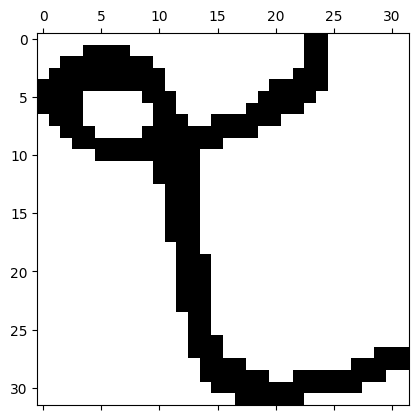

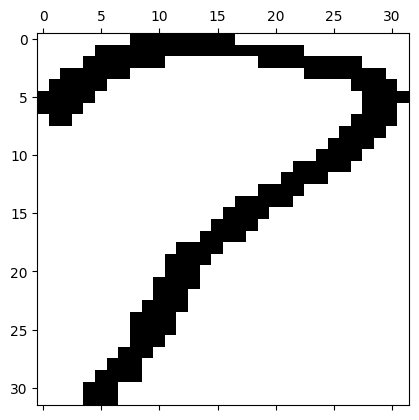

In [378]:
# lets do random prediction 
plt.matshow(x_test[50])
print('Predicted Value is ',np.argmax(y_predicted[50]))
plt.matshow(x_test[100])
print('Predicted Value is ',np.argmax(y_predicted[100]))

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 2.1212e-06 - accuracy: 1.0000 - val_loss: 0.3185 - val_accuracy: 0.9494
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 2.0825e-06 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9494
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.9961e-06 - accuracy: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9494
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1.9570e-06 - accuracy: 1.0000 - val_loss: 0.3176 - val_accuracy: 0.9494
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 1.9406e-06 - accuracy: 1.0000 - val_loss: 0.3141 - val_accuracy: 0.9494
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1.8926e-06 - accuracy: 1.0000 - val_loss: 0.3158 - val_accuracy: 0.9494
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 1.8991e-06 - accuracy: 1.0000 - val_loss: 0.3152 - val_accuracy:

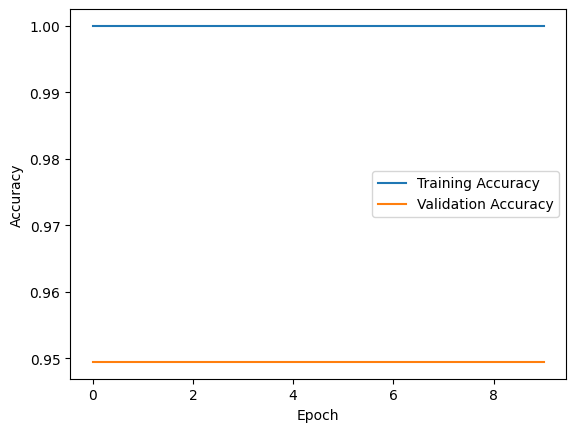

In [379]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc,test_loss)


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()